In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
##1. sentimental analysis on youtube comments

In [5]:
comments= pd.read_csv(r'C:\Users\Immanuel\Desktop\Portfolio Projects\Youtube\GBcomments.csv',error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [6]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [7]:
!pip install textblob

You should consider upgrading via the 'c:\users\immanuel\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
from textblob import TextBlob

In [9]:
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity

0.45000000000000007

In [10]:
##to get the sum of missinig values
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [11]:
comments.dropna(inplace=True)##droping the missing values

In [12]:
polarity=[]

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)    

In [13]:
comments['polarity']=polarity

In [14]:
comments.head(20)

video_id                                       comment_text  likes  \
0   jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1   jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2   jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3   jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4   jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
5   jt2OHQh0HoQ  Keep calm and buy iphone 8 Keep calm and buy i...      0   
6   jt2OHQh0HoQ      i am a big fan of youtube and u !!!!!!!!!!!!!      0   
7   jt2OHQh0HoQ  You will never find Losers who line up and pay...      0   
8   jt2OHQh0HoQ  *APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...      0   
9   jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   
10  jt2OHQh0HoQ           Mom said: Just one more video before bed      0   
11  jt2OHQh0HoQ                           what is the song?? 39:20      0   
12  jt2OHQh0HoQ  I started crying at 49:01 when Emma's EP showe...      0   
13  jt2OHQh0HoQ  3 years late on wireless charging, 3 years lat...      0   
14  jt2OHQh0HoQ                             more one before to bed      0   
15  jt2OHQh0HoQ                subscribe me if you love your mummy      0   
16  jt2OHQh0HoQ  They really just took the samsung s8 and named...      0   
17  jt2OHQh0HoQ  so if someone has a twin sibling both can unlo...      0   
18  jt2OHQh0HoQ             For god sake its better than my ps4pro      0   
19  jt2OHQh0HoQ     7mp cam what kind of standard is this in 2017?      0   

    replies  polarity  
0         0  0.450000  
1         0  0.000000  
2         0  0.000000  
3         0  0.000000  
4         0  1.000000  
5         0  0.300000  
6         0  0.000000  
7         0 -0.100000  
8         0  0.028571  
9         0  0.500000  
10        0  0.500000  
11        0  0.000000  
12        0  0.300000  
13        0  0.026563  
14        0  0.500000  
15        0  0.500000  
16        0  0.200000  
17        0  0.250000  
18        0  0.500000  
19        0  0.300000

In [ ]:
##2.EDA for positive sentences

In [18]:
comments_positive=comments[comments['polarity']==1]

In [19]:
comments_positive.shape

(20400, 5)

In [20]:
comments_positive.head()

video_id                                       comment_text  likes  \
4    jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
26   jt2OHQh0HoQ            The best thing to ever happen to iPhone      0   
80   jt2OHQh0HoQ  Apple is always awesome \n\nhttps://youtu.be/r...      0   
158  YPVcg45W0z4  das a lot of edditing you have done there ... ...      0   
175  YPVcg45W0z4                        Welcome to the Scandiworld!      0   

     replies  polarity  
4          0       1.0  
26         2       1.0  
80         1       1.0  
158        0       1.0  
175        0       1.0

In [21]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\immanuel\anaconda3\python.exe -m pip install --upgrade pip' command.


In [18]:
from wordcloud import WordCloud,STOPWORDS

In [19]:
stopwords=set(STOPWORDS)

In [27]:
total_comments=' '.join(comments_positive['comment_text'])

In [29]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

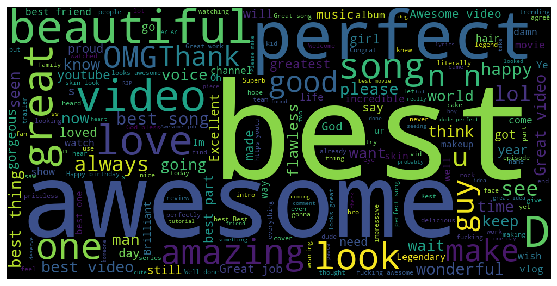

In [32]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
##3. EDA for negative comments

In [15]:
comments_negative=comments[comments['polarity']==-1]

In [16]:
comments_negative.shape

(3339, 5)

In [17]:
comments_negative.head()

video_id                                       comment_text  likes  \
1387  ql0Op1VcELw                                             boring      0   
1394  ql0Op1VcELw                  0:22   **laughs at terrible pun**      1   
1530  -Ifnaxi2LQg          this is the worst thing i've heard. ever.      0   
1745  F2uJvwiSZAQ  People making jokes about 9/11 is truly disgus...      1   
1793  F2uJvwiSZAQ                                      Thats insane.      0   

      replies  polarity  
1387        0      -1.0  
1394        1      -1.0  
1530        0      -1.0  
1745        0      -1.0  
1793        0      -1.0

In [21]:
total_comments2=' '.join(comments_negative['comment_text'])

In [22]:
wordcloud2=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments2)

(-0.5, 999.5, 499.5, -0.5)

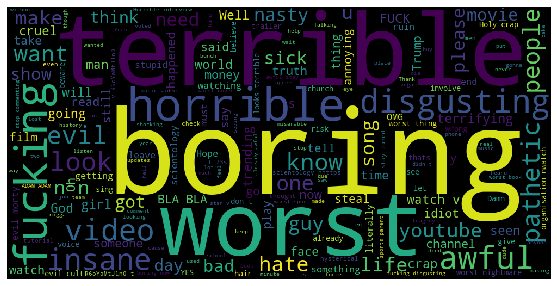

In [23]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud2)
plt.axis('off')

In [ ]:
## Analysing trending tags on youtube

In [30]:
videos=pd.read_csv(r'C:\Users\Immanuel\Desktop\Portfolio Projects\Youtube\USvideos.csv',error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [31]:
videos.head()

video_id                                              title  \
0  XpVt6Z1Gjjo  1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...   
1  K4wEI5zhHB0            iPhone X — Introducing iPhone X — Apple   
2  cLdxuaxaQwc                                        My Response   
3  WYYvHb03Eog                          Apple iPhone X first look   
4  sjlHnJvXdQs                                  iPhone X (parody)   

      channel_title  category_id  \
0  Logan Paul Vlogs           24   
1             Apple           28   
2         PewDiePie           22   
3         The Verge           28   
4        jacksfilms           23   

                                                tags    views   likes  \
0  logan paul vlog|logan paul|logan|paul|olympics...  4394029  320053   
1  Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...  7860119  185853   
2                                             [none]  5845909  576597   
3  apple iphone x hands on|Apple iPhone X|iPhone ...  2642103   24975   
4  jacksfilms|parody|parodies|iphone|iphone x|iph...  1168130   96666   

   dislikes  comment_total                                  thumbnail_link  \
0      5931          46245  https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg   
1     26679              0  https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg   
2     39774         170708  https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg   
3      4542          12829  https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg   
4       568           6666  https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [35]:
#calling the videos tag column
tags_complete=' '.join(videos['tags'])
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [36]:
##to remove unwanted characters
import re

In [41]:
tags=re.sub('[^a-zA-Z]',' ',tags_complete)
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [42]:
tags=re.sub(' +',' ',tags)

In [43]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

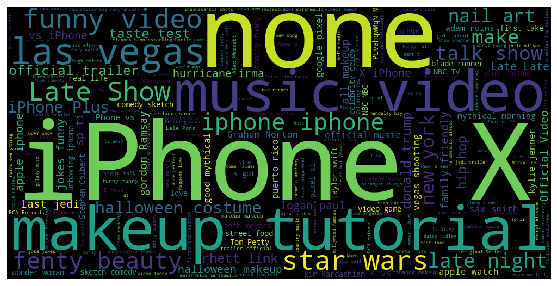

In [45]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
##performing analysis on like,views and dislikes and find out how they are co-related

Text(0.5, 1.0, 'Regression plot for views and likes')

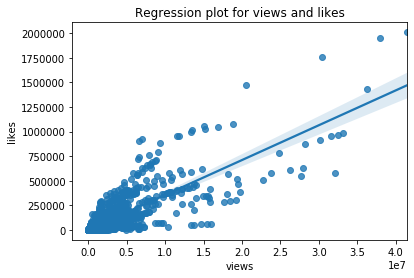

In [47]:
##regression plot for views and likes
sns.regplot(data=videos,x='views',y='likes')
plt.title('Regression plot for views and likes')

Text(0.5, 1.0, 'Regression plot for views and dislikes')

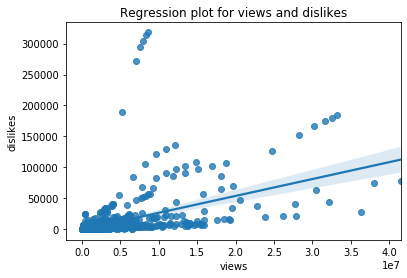

In [49]:
#regression plot for views and dislikes
sns.regplot(data=videos,x='views',y='dislikes')
plt.title('Regression plot for views and dislikes')

In [ ]:
##correlation

In [51]:
df_corr=videos[['views','likes','dislikes']]

In [52]:
df_corr.corr()

views     likes  dislikes
views     1.000000  0.832844  0.541955
likes     0.832844  1.000000  0.497439
dislikes  0.541955  0.497439  1.000000

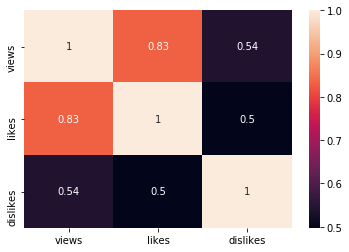

In [54]:
sns.heatmap(df_corr.corr(),annot=True)

In [ ]:
##Analysing emojis in comments

In [55]:
comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  polarity  
0        0      0.45  
1        0      0.00  
2        0      0.00  
3        0      0.00  
4        0      1.00

In [68]:
comments['comment_text'][1]

'To be there with a samsung phone\\n😂😂😂'

In [57]:
print('\U0001F600')

😀


In [58]:
!pip install emoji

  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169298 sha256=353c76c3f35de8ffc1d453617224f3a3b59365943bcccb972ef48944052ce95a
  Stored in directory: c:\users\immanuel\appdata\local\pip\cache\wheels\ea\5f\d3\03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


You should consider upgrading via the 'c:\users\immanuel\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
import emoji

In [60]:
len(comments)

718424

In [6]:
comment=comments['comment_text'][1]

In [9]:
[c for c in comment if c in emoji.UNICODE_EMOJI]

['😂', '😂', '😂']

In [79]:
emoji.__version__

'1.6.1'

In [1]:
pip install emoji==0.6.0

  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=d27b96ff38f82952b0972547cbdd902a1cdf3878fccb3f08961b28eeba7937e9
  Stored in directory: c:\users\immanuel\appdata\local\pip\cache\wheels\4e\bf\6b\2e22b3708d14bf6384f862db539b044d6931bd6b14ad3c9adc
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 1.6.1
    Uninstalling emoji-1.6.1:
      Successfully uninstalled emoji-1.6.1
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Immanuel\anaconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
str=''
for i in comments['comment_text'].dropna():
    list=[c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str=str+ele

In [12]:
len(str)

341868

In [13]:
str

'😂😂😂😭😭😭😢😢😢❤❤😂👏👇👇👇👇👇👇👇👇👇👇🌞😎😣😥😫😭✌😂👎🏻👎🏻👎🏻👎🏻😂🖕😘😘▶⏭⏮◀🔥🔥😊😊🤔🤔😂😂😂😂👏🏻👏🏻❤❤😜😍😍😅❤😍😍✌😂😂😂😊😂😂😂😂😏😏🇪🇸😭💔😊❤❤❤❤❤😂😂😊❤😂🤣✨🌈😘😂😂❤😊😂😊😂💗😂😊😊😊💖🐢😉😍😂😂💗💗😻😻❤😂😂❤❤🤗👌🏼👌🏼😂😂😂😂💖😩🙊♥♥♥😂😂😂💙💙💙💙💙💙😂😂😂❤❤❤😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😱😊😛🌳🌽🎃🚣🚂😂😂😊😕😋🤣😅😢💔😂😊🤡🙏🙏🙏👊🏿🙇🏽👋😅😅😅😅😂😂🤔😎😎😎😎😎😎😎😍😍😍😍😍😍😘😘😘😘😘😘😘😲🖕💪🤘💓☺☺😂😂😂💕😄😄😍💕😉😩❤❤💕❤😂💕😍💗👫💖😆💕💖💕😍😍😊😄😍😀💗🦄😍😊😂😊👍😍♥❤😂👶🏻🤗☺😘💙💙💙😍😍😊😎🤘🖤👌👌😍😂👌🍍😎😎😄😄😄😄😂😂😂😬💜💜💜😭😂😍😍💖😂😂😂😂😂😂😂😭😂😭😂😭😂😂😂😍😍😍😭😍😍😂👀👀🤔😂😂😂😂😂😂😂😂😂😂🍸🍸🍸🍸🍸😂😂😂🤣🤣🤣😂😂😂😂😍💜💜💜💜😂😂😂😅😂😍💖😂😻😉🔥❤😻❤😭😭😭😭😭😭😭👍🏻😍💚💙❤❤😫❤❤❤❤❤♥😍❤😊😍😎💄🐐😅😂😂😊😊👀👌🏽❤❤❤😂💖🎉💪💪🏽😎🙌🙌😜❤❤💛💛😎🙏💚🎉🎉❤🎉🎉🎉🎉🎊🎉🎊🎉😭💗😍😍😍😍😍😍😍👏✌😁❤❤😂💋💋👫💘😻💋💋😂👑🔥🔥🔥🔥🔥🔥🔥🔥🔥🔥😂😐😑😩👌🏻🔥💖👏🏻👀✨👅💦💕❤😍🔥🔥🔥❤❤❤❤❤❤❤👌😍😍😍😞🌴💜💜💜💜😍😍😍😍😍❤❤❤❤❤😊❤❤❤❤🍔🍟🇺🇸😒🌿😄😄😄😉🍲🍱🎏❤💪👊🏽😘😂😂😂❤🙋☺😍😍😚💕😉😂❤❤😊☺💓🌸🙄🙄🙄🙁😞😊🙄😍😨😍😍😍😍😎😃😂😍😏😌😂😎🤑😂😉👍🏻🔥💯🚨😊☺😂😂😂🤣🙂❤❤😀😀😀♥♥😂❤😂😓😭😂❤❤😖😖😂😂😂💗💝😘💐💐💐😂😍☺😂❤😭💕🙌🏽🙌🏽🙌🏽😘😘❤❤💖😫😖📱😂😏🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😁🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗🤗😎😂😂👍🏼💯💕♥♥♥😱😱😱❤❤❤😍😍😩😩😩😩😩😩😩😍😻😻😻😻😻😳🥀♥♥♥♥♥♥😍😍😍🙃😂💕💕💕😍💕💕❤❤💕😍🍫🌹💖🇸🇸🇸🇸❤😍👸🏿👸🏿👸🏿👸🏿👸🏿💗😊😊😩❤👌🏼😻😊😍❤😂😂👏🏼❤❤❤❤❤😍😍😍💚💚💚💚💚😍😭🌹😍❤😍😍😍💚💚💚💚💚😍💚💚💚☺💙😀😍💚😕😍👌😂😂😂😍👌🏻💗❤💚💚💚😸😙😙😘💚💚💚💚😍😭😭💖💓💓💓😍❤😘😘🤗🤗🤗❤😀😀💓💓💓❤😂❤😍❤❤♥♥♥❤🙌❤😂❤❤😍❤💜😍😭😍😍😍😊💗💕😍❤💗💗💛💛💛💖💖😍😐😍😍😍😍🗿😂🤗😩😩😩💖💖💖❤❤❤❤❤😍😍✨😍👍🏻😁😂😍💅❤😘❤❤😈👀😄😈👍☝👆✊👌✌👊✋👋👏👐👉👈💔😂😂😬😭😥☺😂😂😂😂😍😍😍😜😂😂😂😂😂😒👎🏽😱😱😱😱😂😎😛🙊✊✌😑😑😑👌😊

In [14]:
result={}
for i in set(str):
    result[i]=str.count(i)

In [15]:
result

{'🤔': 1734,
 '🌁': 7,
 '⛈': 15,
 '☔': 25,
 '👑': 853,
 '🛢': 4,
 '🥖': 3,
 '🗑': 15,
 '🚐': 6,
 '🇴': 184,
 '🥉': 5,
 '🤣': 2374,
 '😷': 177,
 '🛥': 5,
 '🐐': 209,
 '🕟': 17,
 '😊': 4946,
 '💽': 19,
 '👈': 148,
 '🦄': 544,
 '👥': 13,
 '🌝': 53,
 '🍛': 23,
 '🕸': 22,
 '📿': 14,
 '🙏': 1886,
 '♨': 23,
 '🍠': 16,
 '🤙': 171,
 '👋': 234,
 '🧟': 4,
 '🤝': 32,
 '🛋': 5,
 '🥅': 2,
 '🏖': 15,
 '🤾': 1,
 '🕐': 7,
 '🇫': 81,
 '🐨': 39,
 '👒': 17,
 '☝': 187,
 '🍵': 23,
 '➡': 44,
 '💶': 64,
 '🗳': 5,
 '💖': 4809,
 '🇽': 163,
 '🌺': 312,
 '🧠': 1,
 '💇': 26,
 '👘': 18,
 '🅿': 13,
 '🎌': 2,
 '🚁': 5,
 '🗞': 5,
 '🗡': 10,
 '👆': 114,
 '✅': 128,
 '🏛': 15,
 '⏳': 19,
 '🚹': 6,
 '🎩': 29,
 '💣': 234,
 '👠': 66,
 '❌': 62,
 '🚨': 196,
 '🍘': 10,
 '💀': 892,
 '🕚': 618,
 '🐒': 43,
 '💨': 84,
 '🌅': 38,
 '😐': 598,
 '🚧': 32,
 '😚': 583,
 '🍧': 15,
 '🚠': 5,
 '📆': 8,
 '🎏': 8,
 '🚼': 17,
 '🎰': 16,
 '💤': 84,
 '☀': 96,
 '😮': 596,
 '👱': 57,
 '🌀': 16,
 '🏜': 7,
 '🖋': 7,
 '🍨': 20,
 '🔕': 28,
 '😳': 545,
 '👷': 28,
 '🚮': 19,
 '♑': 9,
 '🤽': 1,
 '🙆': 158,
 '🦀': 21,
 '💺': 9,
 '🐮': 30,
 '⚖

In [17]:
result.items()

dict_items([('🤔', 1734), ('🌁', 7), ('⛈', 15), ('☔', 25), ('👑', 853), ('🛢', 4), ('🥖', 3), ('🗑', 15), ('🚐', 6), ('🇴', 184), ('🥉', 5), ('🤣', 2374), ('😷', 177), ('🛥', 5), ('🐐', 209), ('🕟', 17), ('😊', 4946), ('💽', 19), ('👈', 148), ('🦄', 544), ('👥', 13), ('🌝', 53), ('🍛', 23), ('🕸', 22), ('📿', 14), ('🙏', 1886), ('♨', 23), ('🍠', 16), ('🤙', 171), ('👋', 234), ('🧟', 4), ('🤝', 32), ('🛋', 5), ('🥅', 2), ('🏖', 15), ('🤾', 1), ('🕐', 7), ('🇫', 81), ('🐨', 39), ('👒', 17), ('☝', 187), ('🍵', 23), ('➡', 44), ('💶', 64), ('🗳', 5), ('💖', 4809), ('🇽', 163), ('🌺', 312), ('🧠', 1), ('💇', 26), ('👘', 18), ('🅿', 13), ('🎌', 2), ('🚁', 5), ('🗞', 5), ('🗡', 10), ('👆', 114), ('✅', 128), ('🏛', 15), ('⏳', 19), ('🚹', 6), ('🎩', 29), ('💣', 234), ('👠', 66), ('❌', 62), ('🚨', 196), ('🍘', 10), ('💀', 892), ('🕚', 618), ('🐒', 43), ('💨', 84), ('🌅', 38), ('😐', 598), ('🚧', 32), ('😚', 583), ('🍧', 15), ('🚠', 5), ('📆', 8), ('🎏', 8), ('🚼', 17), ('🎰', 16), ('💤', 84), ('☀', 96), ('😮', 596), ('👱', 57), ('🌀', 16), ('🏜', 7), ('🖋', 7), ('🍨', 20), (

In [18]:
final={}
for key,value in sorted(result.items(),key = lambda item:item[1]):
    final[key]=value

In [19]:
final

{'🤾': 1,
 '🧠': 1,
 '🤽': 1,
 '🦏': 1,
 '🥡': 1,
 '🥜': 1,
 '🥚': 1,
 '🥨': 1,
 '🥟': 1,
 '🧤': 1,
 '🤹': 1,
 '🧣': 1,
 '🥌': 1,
 '🛒': 1,
 '🤺': 1,
 '🦓': 1,
 '🤟': 1,
 '🛷': 1,
 '🥅': 2,
 '🎌': 2,
 '🧘': 2,
 '🤱': 2,
 '🧛': 2,
 '🦖': 2,
 '🧢': 2,
 '🦕': 2,
 '🦔': 2,
 '🧝': 2,
 '🧡': 2,
 '🧒': 2,
 '🥖': 3,
 '🤯': 3,
 '🤨': 3,
 '🧐': 3,
 '🥄': 3,
 '🤫': 3,
 '🛢': 4,
 '🧟': 4,
 '⏯': 4,
 '🏷': 4,
 '🏌': 4,
 '⏹': 4,
 '☦': 4,
 '⚙': 4,
 '⏲': 4,
 '⏸': 4,
 '🤬': 4,
 '☸': 4,
 '🖇': 4,
 '🦍': 4,
 '🥝': 4,
 '♾': 4,
 '🗓': 4,
 '🥞': 4,
 '💹': 4,
 '⏏': 4,
 '🛣': 4,
 '♟': 4,
 '🛬': 4,
 '🦐': 4,
 '🗄': 4,
 '⚗': 4,
 '🦆': 4,
 '🤵': 4,
 '🥈': 4,
 '🗂': 4,
 '🖍': 4,
 '🥉': 5,
 '🛥': 5,
 '🛋': 5,
 '🗳': 5,
 '🚁': 5,
 '🗞': 5,
 '🚠': 5,
 '🕎': 5,
 '🥛': 5,
 '🧖': 5,
 '🔣': 5,
 '🚟': 5,
 '🔚': 5,
 '🔤': 5,
 '➿': 5,
 '🗜': 5,
 '🛂': 5,
 '🆔': 5,
 '⛸': 5,
 '❎': 5,
 '🈁': 5,
 '⛱': 5,
 '🦒': 5,
 '🕹': 5,
 '🈳': 5,
 '🔡': 5,
 '🔄': 5,
 '↖': 5,
 '✡': 5,
 '🔁': 5,
 '㊙': 5,
 '🈲': 5,
 '🔂': 5,
 '◻': 5,
 '🤮': 5,
 '🗃': 5,
 '♦': 5,
 '🆎': 5,
 '⚾': 5,
 '🖼': 5,
 '🈹': 5,
 '🏮': 5,
 '🔖': 5,
 '⛴': 5,
 

In [20]:
keys=[*final.keys()]

In [21]:
keys

['🤾',
 '🧠',
 '🤽',
 '🦏',
 '🥡',
 '🥜',
 '🥚',
 '🥨',
 '🥟',
 '🧤',
 '🤹',
 '🧣',
 '🥌',
 '🛒',
 '🤺',
 '🦓',
 '🤟',
 '🛷',
 '🥅',
 '🎌',
 '🧘',
 '🤱',
 '🧛',
 '🦖',
 '🧢',
 '🦕',
 '🦔',
 '🧝',
 '🧡',
 '🧒',
 '🥖',
 '🤯',
 '🤨',
 '🧐',
 '🥄',
 '🤫',
 '🛢',
 '🧟',
 '⏯',
 '🏷',
 '🏌',
 '⏹',
 '☦',
 '⚙',
 '⏲',
 '⏸',
 '🤬',
 '☸',
 '🖇',
 '🦍',
 '🥝',
 '♾',
 '🗓',
 '🥞',
 '💹',
 '⏏',
 '🛣',
 '♟',
 '🛬',
 '🦐',
 '🗄',
 '⚗',
 '🦆',
 '🤵',
 '🥈',
 '🗂',
 '🖍',
 '🥉',
 '🛥',
 '🛋',
 '🗳',
 '🚁',
 '🗞',
 '🚠',
 '🕎',
 '🥛',
 '🧖',
 '🔣',
 '🚟',
 '🔚',
 '🔤',
 '➿',
 '🗜',
 '🛂',
 '🆔',
 '⛸',
 '❎',
 '🈁',
 '⛱',
 '🦒',
 '🕹',
 '🈳',
 '🔡',
 '🔄',
 '↖',
 '✡',
 '🔁',
 '㊙',
 '🈲',
 '🔂',
 '◻',
 '🤮',
 '🗃',
 '♦',
 '🆎',
 '⚾',
 '🖼',
 '🈹',
 '🏮',
 '🔖',
 '⛴',
 '🔼',
 '🈵',
 '🖲',
 '🚛',
 '⏺',
 '🈴',
 '🈯',
 '🔠',
 '🖊',
 '↪',
 '🖨',
 '♠',
 '☂',
 '↔',
 '🎐',
 '↩',
 '↕',
 '◽',
 '🔢',
 '🧜',
 '⚒',
 '🌫',
 '⛏',
 '🆖',
 '🈂',
 '🔳',
 '⌨',
 'Ⓜ',
 '🛤',
 'ℹ',
 '🔃',
 '🚉',
 '🚻',
 '🗒',
 '🚎',
 '🔲',
 '🚐',
 '🚹',
 '🌥',
 '🕍',
 '⏭',
 '📧',
 '🚄',
 '🦇',
 '⏱',
 '🛠',
 '🎟',
 '⤴',
 '⏫',
 '🕰',
 '⤵',
 '🚃',
 '🖌',
 '🌉',
 '🏸',
 '🆕'

In [22]:
values=[*final.values()]

In [23]:
values

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,


In [25]:
df=pd.DataFrame({'chars':keys[-20],'num':values[-20:]})

In [26]:
df

chars    num
0      🙌   2734
1      🙌   2961
2      🙌   2968
3      🙌   3071
4      🙌   3534
5      🙌   3616
6      🙌   4412
7      🙌   4809
8      🙌   4946
9      🙌   5357
10     🙌   5489
11     🙌   5817
12     🙌   6334
13     🙌   6531
14     🙌   7173
15     🙌   9098
16     🙌  10249
17     🙌  34856
18     🙌  36780
19     🙌  43947

In [32]:
!pip install plotly

You should consider upgrading via the 'c:\users\immanuel\anaconda3\python.exe -m pip install --upgrade pip' command.


In [33]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [38]:
go.Bar(
x=df['chars'],
y=df['num']
)

iplot([trace])

NameError: name 'trace' is not defined